In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [39]:
G =  np.array([1.822, 2.374, 4.066, 8.123, 16.855])
G_err = np.sqrt(G*1000)/1000
x =  np.array([60, 50, 40, 30, 20])/100

In [40]:
def expon(x, a, b, c):
    return a*np.exp(-b*x)+c

In [41]:
offset = G[-1]
ampiezza = G[1] - offset
lam = 1/35
p0 = [ampiezza, lam, offset]
popt, pcov = curve_fit(expon, x, G)

In [45]:
A, B, C = popt

Text(0.5, 1.0, 'Guadagno del rivelatore')

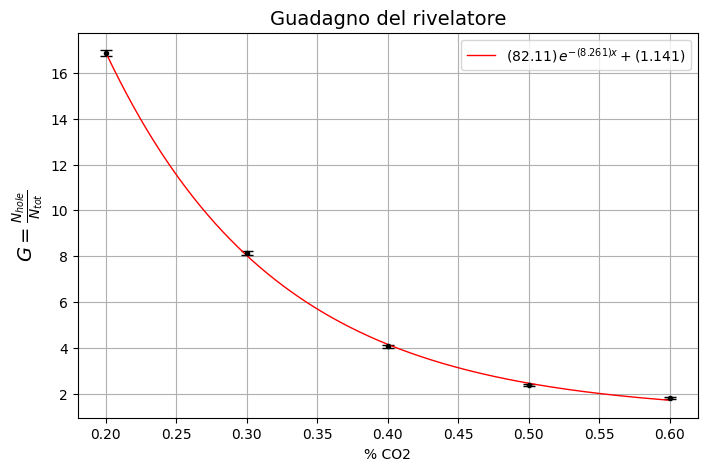

In [54]:
plt.figure(figsize=(8,5))
plt.errorbar(
    x,
    G,
    yerr=G_err,
    fmt=".",
    color="k",
    alpha=1,
    capsize=4
)
x_plot = np.linspace(min(x), max(x), 1000)
plt.plot(
    x_plot,
    expon(x_plot, *popt),
    color='r',
    lw=1,
    label=rf"$({A:.4})\,e^{{-({B:.4})x}} + ({C:.4})$"
)
plt.grid()
plt.legend()
plt.xlabel('% CO2')
plt.ylabel(r'$ G = \frac{N_{hole}}{N_{tot}}$', fontsize=14)
plt.title('Guadagno del rivelatore', fontsize=14)